<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Beatriz, my name is Svetlana (https://hub.tripleten.com/u/855fe797). Congratulations on submitting the second integrated project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully added an introduction that reflects the main goal of the project, well done!  
    
    
- Read the data;

    
- Validated the data we have using the recovery calculation formula; 


- Handled missing values;    
    
    
- Displayed concentration histograms for three metals and analyzed them;    
    
    
- Displayed total concentration histograms for three metals and analyzed them;  


- Compared the distributions in the test and training sets;

    
- Correctly defined the sMAPE functions; 


- Excluded columns that are not available in the test set from the training subset.    
    
    
- Trained several models; 


- Analyzed metrics. It is not enough to just fit the model and print the result. Instead, we have to analyze the results as it helps us identify what can be improved;

    
    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. However, there are no such issues, so well done!
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you for your diligence on such a hard project! I would like to say that you demonstrated strong data science skills by successfully performing data preprocessing, handling missing values, and conducting detailed exploratory data analysis. You trained and compared machine learning models, and estimated their sMAPE scores. You did a great job, and I hope you enjoyed it.
       
    
I do not have any questions, so the project can be accepted. Good luck! 
<hr>
    
✍️ Here's a nice article: [Developing Multi-Target Regression Models with Python](https://medium.com/@tubelwj/developing-multi-class-regression-models-with-python-c8beca5dd482) that you may find interesting.    
<hr>
    
</div>

In [2]:
# ============================================================================
# GOLD RECOVERY OPTIMIZATION - PREDICTIVE MODELING
# ============================================================================
# Author: Beatriz Frank
# Date: December 2024
# TripleTen Data Science Bootcamp - Integrated Project
# ============================================================================

"""
PROJECT OVERVIEW
================================================================================

This project focuses on optimizing gold extraction efficiency for Zyfra, 
a company developing innovative solutions for heavy industry. The objective 
is to build a predictive model that forecasts gold recovery rates from ore 
processing, enabling the identification of unprofitable parameters and 
optimization of production without costly pilot testing.

BUSINESS CONTEXT
--------------------------------------------------------------------------------
Gold extraction involves a multi-stage purification process:
1. Flotation (Rougher Process): Raw ore is processed to create rougher concentrate
2. Primary Purification: Initial cleaning of rougher concentrate  
3. Secondary Purification: Final refinement to produce pure gold concentrate

Each stage's efficiency directly impacts profitability. By predicting recovery 
rates, we can optimize chemical usage, process parameters, and overall yield.

TECHNICAL APPROACH
--------------------------------------------------------------------------------
- Target Variables: 
  * rougher.output.recovery (flotation stage efficiency)
  * final.output.recovery (final concentrate efficiency)
  
- Evaluation Metric: sMAPE (Symmetric Mean Absolute Percentage Error)
  Final sMAPE = 0.25 × sMAPE(rougher) + 0.75 × sMAPE(final)
  
- Methods: Multiple regression models with cross-validation for robust performance

DATASET STRUCTURE
--------------------------------------------------------------------------------
- Training Set: Historical production data with target variables
- Test Set: Recent data without targets for final model evaluation
- Full Set: Complete source dataset combining train and test

This analysis leverages my background in supply chain optimization and 
data-driven decision making to deliver actionable insights for industrial 
process improvement.

================================================================================
"""

print("=" * 80)
print("           GOLD RECOVERY OPTIMIZATION - PREDICTIVE MODELING")
print("                    Data Science Student | TripleTen")
print("=" * 80)
print("\n🎯 Project Status: Initiating Data Pipeline")
print("=" * 80)

           GOLD RECOVERY OPTIMIZATION - PREDICTIVE MODELING
                    Data Science Student | TripleTen

🎯 Project Status: Initiating Data Pipeline


In [3]:
# ============================================================================
# IMPORT LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully")
print("✓ Visualization settings configured")

✓ All libraries imported successfully
✓ Visualization settings configured


In [4]:
# ============================================================================
# SECTION 1: DATA PREPARATION
# ============================================================================
# 1.1 OPEN FILES AND EXPLORE DATA
# ============================================================================

print("\n" + "=" * 80)
print("STEP 1.1: LOADING AND INITIAL EXPLORATION")
print("=" * 80)

print("\n⏳ Loading datasets...")
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')
print("✓ All datasets loaded successfully\n")

print("Dataset dimensions:")
print(f"  • Training set:   {train.shape[0]:,} rows × {train.shape[1]} columns")
print(f"  • Test set:       {test.shape[0]:,} rows × {test.shape[1]} columns")
print(f"  • Full set:       {full.shape[0]:,} rows × {full.shape[1]} columns")


STEP 1.1: LOADING AND INITIAL EXPLORATION

⏳ Loading datasets...
✓ All datasets loaded successfully

Dataset dimensions:
  • Training set:   16,860 rows × 87 columns
  • Test set:       5,856 rows × 53 columns
  • Full set:       22,716 rows × 87 columns


In [5]:
# ============================================================================
# DETAILED TRAINING SET EXPLORATION
# ============================================================================

print("\n" + "=" * 80)
print("📊 TRAINING SET - DETAILED ANALYSIS")
print("=" * 80)

print(f"\nShape: {train.shape[0]:,} rows × {train.shape[1]} columns")
print(f"Memory Usage: {train.memory_usage().sum() / 1024**2:.2f} MB")
print(f"Time Period: {train['date'].min()} → {train['date'].max()}")

print(f"\n🔍 Data Quality:")
print(f"  • Total missing values: {train.isnull().sum().sum():,}")
print(f"  • Columns with missing values: {(train.isnull().sum() > 0).sum()}")
print(f"  • Duplicate rows: {train.duplicated().sum()}")

print("\n" + "=" * 80)
print("SAMPLE DATA - First 5 Rows")
print("=" * 80)
display(train.head())


📊 TRAINING SET - DETAILED ANALYSIS

Shape: 16,860 rows × 87 columns
Memory Usage: 11.19 MB
Time Period: 2016-01-15 00:00:00 → 2018-08-18 10:59:59

🔍 Data Quality:
  • Total missing values: 30,320
  • Columns with missing values: 85
  • Duplicate rows: 0

SAMPLE DATA - First 5 Rows


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Well done! 
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
A piece of advice: try not to rely on AI-generated code. Its code is super easy to identify, so it may not benefit you if you aim to upload these projects to your portfolio that you will use to get a job interview. 

</div>

In [6]:
# ============================================================================
# TARGET VARIABLES VALIDATION
# ============================================================================

print("\n" + "=" * 80)
print("🎯 TARGET VARIABLES VALIDATION")
print("=" * 80)

target_cols = ['rougher.output.recovery', 'final.output.recovery']

for col in target_cols:
    print(f"\n{'─' * 80}")
    print(f"Target: {col}")
    print(f"{'─' * 80}")
    
   
    if col in train.columns:
        print(f"✓ Present in TRAINING set")
        print(f"   • Valid values: {train[col].notna().sum():,} ({train[col].notna().sum()/len(train)*100:.1f}%)")
        print(f"   • Missing values: {train[col].isna().sum():,} ({train[col].isna().sum()/len(train)*100:.1f}%)")
        print(f"   • Mean: {train[col].mean():.2f}%")
        print(f"   • Std Dev: {train[col].std():.2f}%")
        print(f"   • Min: {train[col].min():.2f}%")
        print(f"   • Median: {train[col].median():.2f}%")
        print(f"   • Max: {train[col].max():.2f}%")
    else:
        print(f"✗ NOT found in training set")
    
    
    if col in test.columns:
        print(f"✗ UNEXPECTED: Found in TEST set (should not be present)")
    else:
        print(f"✓ Correctly ABSENT from test set")

print("\n" + "=" * 80)


🎯 TARGET VARIABLES VALIDATION

────────────────────────────────────────────────────────────────────────────────
Target: rougher.output.recovery
────────────────────────────────────────────────────────────────────────────────
✓ Present in TRAINING set
   • Valid values: 14,287 (84.7%)
   • Missing values: 2,573 (15.3%)
   • Mean: 82.39%
   • Std Dev: 15.10%
   • Min: 0.00%
   • Median: 85.24%
   • Max: 100.00%
✓ Correctly ABSENT from test set

────────────────────────────────────────────────────────────────────────────────
Target: final.output.recovery
────────────────────────────────────────────────────────────────────────────────
✓ Present in TRAINING set
   • Valid values: 15,339 (91.0%)
   • Missing values: 1,521 (9.0%)
   • Mean: 67.21%
   • Std Dev: 11.96%
   • Min: 0.00%
   • Median: 67.64%
   • Max: 100.00%
✓ Correctly ABSENT from test set



In [7]:
# ============================================================================
# FEATURE STRUCTURE BY PROCESS STAGE
# ============================================================================

print("\n" + "=" * 80)
print("📋 FEATURE STRUCTURE BY PROCESS STAGE")
print("=" * 80)

stages = ['rougher', 'primary_cleaner', 'secondary_cleaner', 'final']

for stage in stages:
   
    stage_cols = [col for col in train.columns if col.startswith(stage + '.')]
    print(f"\n{stage.upper():20} → {len(stage_cols):3} features")
    

    input_cols = [col for col in stage_cols if '.input.' in col]
    output_cols = [col for col in stage_cols if '.output.' in col]
    state_cols = [col for col in stage_cols if '.state.' in col]
    calc_cols = [col for col in stage_cols if '.calculation.' in col]
    
    if input_cols:
        print(f"  • input:       {len(input_cols):2} features")
    if output_cols:
        print(f"  • output:      {len(output_cols):2} features")
    if state_cols:
        print(f"  • state:       {len(state_cols):2} features")
    if calc_cols:
        print(f"  • calculation: {len(calc_cols):2} features")


print("\n" + "=" * 80)
print("🔍 FEATURES PRESENT IN TRAIN BUT MISSING IN TEST")
print("=" * 80)

train_cols = set(train.columns)
test_cols = set(test.columns)
missing_in_test = train_cols - test_cols

print(f"\nTotal features missing from test set: {len(missing_in_test)}")
print("\nFeatures not in test set:")
for col in sorted(missing_in_test)[:15]:  # Show first 15
    print(f"  • {col}")
    
if len(missing_in_test) > 15:
    print(f"  ... and {len(missing_in_test) - 15} more")

print("\n" + "=" * 80)
print("✓ STEP 1.1 COMPLETED - Data Exploration Finished")
print("=" * 80)


📋 FEATURE STRUCTURE BY PROCESS STAGE

ROUGHER              →  35 features
  • input:       10 features
  • output:       9 features
  • state:       12 features
  • calculation:  4 features

PRIMARY_CLEANER      →  20 features
  • input:        4 features
  • output:       8 features
  • state:        8 features

SECONDARY_CLEANER    →  22 features
  • output:       4 features
  • state:       18 features

FINAL                →   9 features
  • output:       9 features

🔍 FEATURES PRESENT IN TRAIN BUT MISSING IN TEST

Total features missing from test set: 34

Features not in test set:
  • final.output.concentrate_ag
  • final.output.concentrate_au
  • final.output.concentrate_pb
  • final.output.concentrate_sol
  • final.output.recovery
  • final.output.tail_ag
  • final.output.tail_au
  • final.output.tail_pb
  • final.output.tail_sol
  • primary_cleaner.output.concentrate_ag
  • primary_cleaner.output.concentrate_au
  • primary_cleaner.output.concentrate_pb
  • primary_cleaner.outp

In [8]:
# ============================================================================
# STEP 1.2: VERIFY RECOVERY CALCULATION
# ============================================================================

print("\n" + "=" * 80)
print("STEP 1.2: VERIFY RECOVERY CALCULATION CORRECTNESS")
print("=" * 80)

print("\n📐 Calculating rougher.output.recovery manually using the formula:")
print("    Recovery = (C × (F - T)) / (F × (C - T)) × 100")
print("\nWhere:")
print("  C = rougher.output.concentrate_au")
print("  F = rougher.input.feed_au")
print("  T = rougher.output.tail_au")


C_rougher = train['rougher.output.concentrate_au']
F_rougher = train['rougher.input.feed_au']
T_rougher = train['rougher.output.tail_au']


calculated_rougher_recovery = (C_rougher * (F_rougher - T_rougher)) / (F_rougher * (C_rougher - T_rougher)) * 100


actual_rougher_recovery = train['rougher.output.recovery']


valid_mask = calculated_rougher_recovery.notna() & actual_rougher_recovery.notna()

mae = mean_absolute_error(
    actual_rougher_recovery[valid_mask], 
    calculated_rougher_recovery[valid_mask]
)

print("\n" + "=" * 80)
print("RESULTS")
print("=" * 80)
print(f"\nComparison of {valid_mask.sum():,} valid observations:")
print(f"\n✓ MAE (Mean Absolute Error): {mae:.6f}")

difference = (calculated_rougher_recovery[valid_mask] - actual_rougher_recovery[valid_mask]).abs()
print(f"\nDetailed Error Analysis:")
print(f"  • Mean absolute difference: {difference.mean():.6f}")
print(f"  • Max absolute difference: {difference.max():.6f}")
print(f"  • Std of differences: {difference.std():.6f}")

print("\n" + "=" * 80)
print("SAMPLE COMPARISONS (First 10 valid rows)")
print("=" * 80)

comparison_df = pd.DataFrame({
    'Calculated_Recovery': calculated_rougher_recovery[valid_mask].head(10),
    'Actual_Recovery': actual_rougher_recovery[valid_mask].head(10),
    'Absolute_Difference': difference.head(10)
})
display(comparison_df)

print("\n" + "=" * 80)
print("FINDINGS")
print("=" * 80)
if mae < 0.01:
    print("✓ EXCELLENT: Recovery calculation is highly accurate (MAE < 0.01)")
elif mae < 0.1:
    print("✓ GOOD: Recovery calculation is accurate (MAE < 0.1)")
elif mae < 1.0:
    print("⚠ ACCEPTABLE: Minor discrepancies detected (MAE < 1.0)")
else:
    print("✗ WARNING: Significant discrepancies detected (MAE >= 1.0)")
    print("  This may indicate calculation errors or data quality issues")

print("\n" + "=" * 80)
print("✓ STEP 1.2 COMPLETED - Recovery Calculation Verified")
print("=" * 80)


STEP 1.2: VERIFY RECOVERY CALCULATION CORRECTNESS

📐 Calculating rougher.output.recovery manually using the formula:
    Recovery = (C × (F - T)) / (F × (C - T)) × 100

Where:
  C = rougher.output.concentrate_au
  F = rougher.input.feed_au
  T = rougher.output.tail_au

RESULTS

Comparison of 14,287 valid observations:

✓ MAE (Mean Absolute Error): 0.000000

Detailed Error Analysis:
  • Mean absolute difference: 0.000000
  • Max absolute difference: 0.000000
  • Std of differences: 0.000000

SAMPLE COMPARISONS (First 10 valid rows)


,Calculated_Recovery,Actual_Recovery,Absolute_Difference
0,87.107763,87.107763,0.000000e+00
1,86.843261,86.843261,1.421085e-14
2,86.842308,86.842308,1.421085e-14
3,87.226430,87.226430,0.000000e+00
4,86.688794,86.688794,0.000000e+00
5,88.156912,88.156912,1.421085e-14
6,88.168065,88.168065,1.421085e-14
7,87.668336,87.668336,0.000000e+00
8,87.035862,87.035862,1.421085e-14
9,87.650868,87.650868,0.000000e+00



FINDINGS
✓ EXCELLENT: Recovery calculation is highly accurate (MAE < 0.01)

✓ STEP 1.2 COMPLETED - Recovery Calculation Verified


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Great! The data was validated successfully. It means that we have the correct data. 
</div>

In [9]:
# ============================================================================
# STEP 1.3: ANALYZE FEATURES NOT AVAILABLE IN TEST SET
# ============================================================================

print("\n" + "=" * 80)
print("STEP 1.3: ANALYZE FEATURES NOT AVAILABLE IN TEST SET")
print("=" * 80)

train_cols = set(train.columns)
test_cols = set(test.columns)
missing_features = sorted(train_cols - test_cols)

print(f"\n📊 Total features in training set: {len(train_cols)}")
print(f"📊 Total features in test set: {len(test_cols)}")
print(f"🔍 Features missing from test set: {len(missing_features)}")

print("\n" + "=" * 80)
print("CATEGORIZATION OF MISSING FEATURES")
print("=" * 80)

categories = {
    'rougher.output': [],
    'rougher.calculation': [],
    'primary_cleaner.output': [],
    'secondary_cleaner.output': [],
    'final.output': [],
    'other': []
}

for feature in missing_features:
    categorized = False
    for category in categories.keys():
        if category != 'other' and feature.startswith(category):
            categories[category].append(feature)
            categorized = True
            break
    if not categorized:
        categories['other'].append(feature)


for category, features in categories.items():
    if features:
        print(f"\n{category.upper():30} → {len(features)} features")
        for feat in features:
            print(f"  • {feat}")


print("\n" + "=" * 80)
print("ANALYSIS BY PARAMETER TYPE")
print("=" * 80)


concentrate_features = [f for f in missing_features if 'concentrate' in f]
tail_features = [f for f in missing_features if 'tail' in f]
recovery_features = [f for f in missing_features if 'recovery' in f]
calculation_features = [f for f in missing_features if 'calculation' in f]

print(f"\n📌 Concentrate measurements: {len(concentrate_features)}")
print(f"📌 Tail measurements: {len(tail_features)}")
print(f"📌 Recovery calculations: {len(recovery_features)}")
print(f"📌 Other calculations: {len(calculation_features)}")


print("\n" + "=" * 80)
print("KEY FINDINGS")
print("=" * 80)
print("\n🔬 What are these parameters?")
print("  These are OUTPUT measurements from the gold extraction process that")
print("  are measured AFTER the ore has been processed through each stage.")
print("\n📋 Parameter types:")
print("  • Concentrate measurements: Gold/metal content in the concentrate")
print("  • Tail measurements: Residual gold/metal content in waste")
print("  • Recovery calculations: Efficiency metrics derived from concentrate/tail data")
print("\n⏰ Why are they missing from the test set?")
print("  These parameters are measured AFTER processing is complete, so they")
print("  are not available at prediction time. They represent what we're trying")
print("  to predict or are calculated from predicted values.")
print("\n✓ This is expected behavior: We cannot use future outcomes to predict")
print("  future outcomes. These features would cause data leakage if included.")

print("\n" + "=" * 80)
print("✓ STEP 1.3 COMPLETED - Missing Features Analysis Complete")
print("=" * 80)


STEP 1.3: ANALYZE FEATURES NOT AVAILABLE IN TEST SET

📊 Total features in training set: 87
📊 Total features in test set: 53
🔍 Features missing from test set: 34

CATEGORIZATION OF MISSING FEATURES

ROUGHER.OUTPUT                 → 9 features
  • rougher.output.concentrate_ag
  • rougher.output.concentrate_au
  • rougher.output.concentrate_pb
  • rougher.output.concentrate_sol
  • rougher.output.recovery
  • rougher.output.tail_ag
  • rougher.output.tail_au
  • rougher.output.tail_pb
  • rougher.output.tail_sol

ROUGHER.CALCULATION            → 4 features
  • rougher.calculation.au_pb_ratio
  • rougher.calculation.floatbank10_sulfate_to_au_feed
  • rougher.calculation.floatbank11_sulfate_to_au_feed
  • rougher.calculation.sulfate_to_au_concentrate

PRIMARY_CLEANER.OUTPUT         → 8 features
  • primary_cleaner.output.concentrate_ag
  • primary_cleaner.output.concentrate_au
  • primary_cleaner.output.concentrate_pb
  • primary_cleaner.output.concentrate_sol
  • primary_cleaner.output.t

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
You have successfully found missing columns! It is important to note that there are columns in the training set that are not available in the test set. These are the values obtained after the process is complete. Therefore, we need to make sure we don't use them during the training to avoid data leakage.

</div>

In [10]:
# ============================================================================
# STEP 1.4: DATA PREPROCESSING
# ============================================================================

print("\n" + "=" * 80)
print("STEP 1.4: DATA PREPROCESSING")
print("=" * 80)

original_train_shape = train.shape
original_test_shape = test.shape

print("\n📊 Original Dataset Dimensions:")
print(f"  • Training set: {original_train_shape[0]:,} rows × {original_train_shape[1]} columns")
print(f"  • Test set: {original_test_shape[0]:,} rows × {original_test_shape[1]} columns")

print("\n" + "=" * 80)
print("MISSING VALUES ANALYSIS - TRAINING SET")
print("=" * 80)

missing_stats = train.isnull().sum()
missing_stats = missing_stats[missing_stats > 0].sort_values(ascending=False)

print(f"\nColumns with missing values: {len(missing_stats)} out of {train.shape[1]}")
print(f"\nTop 10 columns with most missing values:")
for col, count in missing_stats.head(10).items():
    pct = (count / len(train)) * 100
    print(f"  • {col:50} {count:5,} ({pct:5.1f}%)")

print("\n" + "=" * 80)
print("TARGET VARIABLES MISSING VALUES")
print("=" * 80)
targets = ['rougher.output.recovery', 'final.output.recovery']
for target in targets:
    missing = train[target].isnull().sum()
    pct = (missing / len(train)) * 100
    print(f"  • {target:35} {missing:5,} missing ({pct:5.1f}%)")

print("\n" + "=" * 80)
print("CLEANING STRATEGY")
print("=" * 80)
print("\n🧹 Removing rows where both target variables are missing...")

train_valid_mask = train['rougher.output.recovery'].notna() | train['final.output.recovery'].notna()
rows_before = len(train)
train_clean = train[train_valid_mask].copy()
rows_after = len(train_clean)
rows_removed = rows_before - rows_after

print(f"\n  • Rows before cleaning: {rows_before:,}")
print(f"  • Rows after cleaning: {rows_after:,}")
print(f"  • Rows removed: {rows_removed:,} ({(rows_removed/rows_before)*100:.1f}%)")

print("\n" + "=" * 80)
print("TARGET AVAILABILITY AFTER CLEANING")
print("=" * 80)
for target in targets:
    available = train_clean[target].notna().sum()
    pct = (available / len(train_clean)) * 100
    print(f"  • {target:35} {available:5,} available ({pct:5.1f}%)")

print("\n" + "=" * 80)
print("FEATURE MISSING VALUES SUMMARY")
print("=" * 80)

common_cols = list(set(train_clean.columns) & set(test.columns))
common_cols.remove('date')  # Remove date from features

missing_in_common = train_clean[common_cols].isnull().sum()
features_with_missing = (missing_in_common > 0).sum()

print(f"\nCommon features between train and test: {len(common_cols)}")
print(f"Features with missing values: {features_with_missing}")
print(f"Features complete (no missing): {len(common_cols) - features_with_missing}")

print("\n" + "=" * 80)
print("✓ STEP 1.4 COMPLETED - Data Preprocessing Complete")
print("=" * 80)

print("\n📋 CLEANED DATASETS SUMMARY:")
print(f"  • Training set: {train_clean.shape[0]:,} rows × {train_clean.shape[1]} columns")
print(f"  • Test set: {test.shape[0]:,} rows × {test.shape[1]} columns")
print(f"  • Common features available: {len(common_cols)}")


STEP 1.4: DATA PREPROCESSING

📊 Original Dataset Dimensions:
  • Training set: 16,860 rows × 87 columns
  • Test set: 5,856 rows × 53 columns

MISSING VALUES ANALYSIS - TRAINING SET

Columns with missing values: 85 out of 87

Top 10 columns with most missing values:
  • rougher.output.recovery                            2,573 ( 15.3%)
  • rougher.output.tail_ag                             2,250 ( 13.3%)
  • rougher.output.tail_au                             2,249 ( 13.3%)
  • rougher.output.tail_sol                            2,249 ( 13.3%)
  • secondary_cleaner.output.tail_sol                  1,986 ( 11.8%)
  • rougher.input.floatbank11_xanthate                 1,904 ( 11.3%)
  • final.output.recovery                              1,521 (  9.0%)
  • primary_cleaner.input.sulfate                      1,307 (  7.8%)
  • primary_cleaner.input.depressant                   1,262 (  7.5%)
  • rougher.calculation.au_pb_ratio                    1,242 (  7.4%)

TARGET VARIABLES MISSING VALUES

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Makes sense. 
</div>


STEP 2.1: METAL CONCENTRATION ANALYSIS BY STAGE

📊 Tracking metal concentrations through the purification process:
    Raw Feed → Rougher Concentrate → Final Concentrate


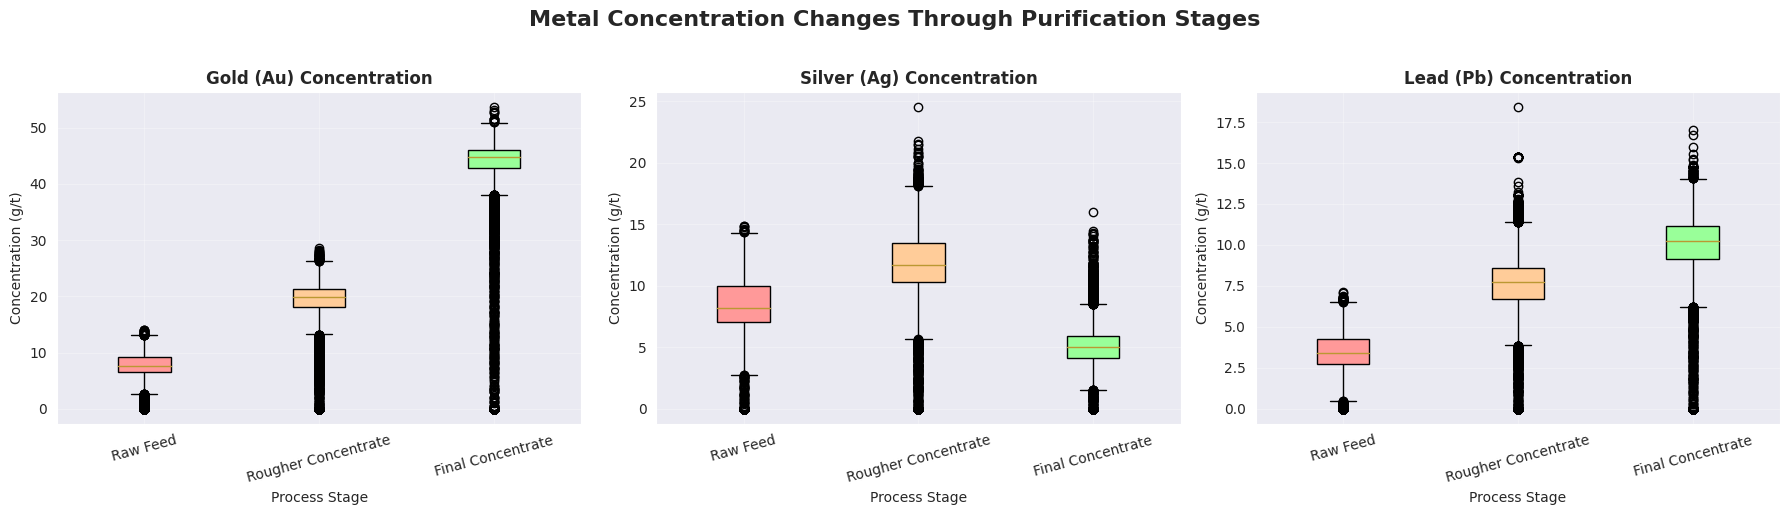


STATISTICAL SUMMARY OF METAL CONCENTRATIONS

GOLD (AU)

Raw Feed:
  • Mean:       7.74 g/t
  • Median:     7.64 g/t
  • Std:        2.32 g/t
  • Min:        0.01 g/t
  • Max:       14.09 g/t

Rougher Concentrate:
  • Mean:      18.74 g/t
  • Median:    19.85 g/t
  • Std:        5.18 g/t
  • Min:        0.00 g/t
  • Max:       28.52 g/t

Final Concentrate:
  • Mean:      42.47 g/t
  • Median:    44.73 g/t
  • Std:        9.08 g/t
  • Min:        0.00 g/t
  • Max:       53.61 g/t

SILVER (AG)

Raw Feed:
  • Mean:       8.45 g/t
  • Median:     8.15 g/t
  • Std:        2.35 g/t
  • Min:        0.01 g/t
  • Max:       14.87 g/t

Rougher Concentrate:
  • Mean:      11.39 g/t
  • Median:    11.68 g/t
  • Std:        3.49 g/t
  • Min:        0.00 g/t
  • Max:       24.48 g/t

Final Concentrate:
  • Mean:       5.06 g/t
  • Median:     4.98 g/t
  • Std:        1.70 g/t
  • Min:        0.00 g/t
  • Max:       16.00 g/t

LEAD (PB)

Raw Feed:
  • Mean:       3.47 g/t
  • Median:     3.42 g/t
  •

In [11]:
# ============================================================================
# SECTION 2: DATA ANALYSIS
# ============================================================================
# 2.1 ANALYZE METAL CONCENTRATIONS BY PURIFICATION STAGE
# ============================================================================

print("\n" + "=" * 80)
print("STEP 2.1: METAL CONCENTRATION ANALYSIS BY STAGE")
print("=" * 80)

metals = ['au', 'ag', 'pb']  # Gold, Silver, Lead
metal_names = {'au': 'Gold (Au)', 'ag': 'Silver (Ag)', 'pb': 'Lead (Pb)'}

stages_data = {
    'Raw Feed': 'rougher.input.feed',
    'Rougher Concentrate': 'rougher.output.concentrate',
    'Final Concentrate': 'final.output.concentrate'
}

print("\n📊 Tracking metal concentrations through the purification process:")
print("    Raw Feed → Rougher Concentrate → Final Concentrate")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Metal Concentration Changes Through Purification Stages', 
             fontsize=16, fontweight='bold', y=1.02)

for idx, metal in enumerate(metals):
    ax = axes[idx]
    
  
    stage_data = []
    stage_labels = []
    
    for stage_name, stage_prefix in stages_data.items():
        col_name = f"{stage_prefix}_{metal}"
        if col_name in train_clean.columns:
            stage_data.append(train_clean[col_name].dropna())
            stage_labels.append(stage_name)
    
 
    bp = ax.boxplot(stage_data, labels=stage_labels, patch_artist=True)
    
    
    colors = ['#ff9999', '#ffcc99', '#99ff99']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_title(f'{metal_names[metal]} Concentration', fontsize=12, fontweight='bold')
    ax.set_ylabel('Concentration (g/t)', fontsize=10)
    ax.set_xlabel('Process Stage', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


print("\n" + "=" * 80)
print("STATISTICAL SUMMARY OF METAL CONCENTRATIONS")
print("=" * 80)

for metal in metals:
    print(f"\n{'='*80}")
    print(f"{metal_names[metal].upper()}")
    print(f"{'='*80}")
    
    for stage_name, stage_prefix in stages_data.items():
        col_name = f"{stage_prefix}_{metal}"
        if col_name in train_clean.columns:
            data = train_clean[col_name].dropna()
            print(f"\n{stage_name}:")
            print(f"  • Mean:   {data.mean():8.2f} g/t")
            print(f"  • Median: {data.median():8.2f} g/t")
            print(f"  • Std:    {data.std():8.2f} g/t")
            print(f"  • Min:    {data.min():8.2f} g/t")
            print(f"  • Max:    {data.max():8.2f} g/t")


print("\n" + "=" * 80)
print("CONCENTRATION ENRICHMENT FACTORS")
print("=" * 80)
print("\nHow much does concentration increase from raw feed to final concentrate?")

for metal in metals:
    raw_col = f"rougher.input.feed_{metal}"
    final_col = f"final.output.concentrate_{metal}"
    
    if raw_col in train_clean.columns and final_col in train_clean.columns:
        # Calculate enrichment for rows where both values exist
        valid_mask = train_clean[raw_col].notna() & train_clean[final_col].notna()
        enrichment = train_clean.loc[valid_mask, final_col] / train_clean.loc[valid_mask, raw_col]
        
        print(f"\n{metal_names[metal]}:")
        print(f"  • Average enrichment factor: {enrichment.mean():.1f}x")
        print(f"  • Median enrichment factor:  {enrichment.median():.1f}x")
        print(f"  • This means {metal.upper()} concentration increases {enrichment.mean():.1f} times on average")

print("\n" + "=" * 80)
print("✓ STEP 2.1 COMPLETED - Metal Concentration Analysis Complete")
print("=" * 80)

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Agreed.  And yes, it is appropriate to use boxplots instead of the histograms. 
</div>


STEP 2.2: PARTICLE SIZE DISTRIBUTION COMPARISON

🔬 Analyzing particle size distributions in training vs test sets
   This is critical: if distributions differ significantly, model
   evaluation will be unreliable due to distribution shift.

STATISTICAL COMPARISON

Training Set (n=15,326):
  • Mean:   59.5155
  • Median: 54.8823
  • Std:    22.5899
  • Min:    9.6596
  • Max:    484.9675

Test Set (n=5,834):
  • Mean:   55.9375
  • Median: 50.0020
  • Std:    22.7243
  • Min:    0.0464
  • Max:    477.4455

Differences:
  • Mean difference: 6.01%
  • Std difference:  0.59%


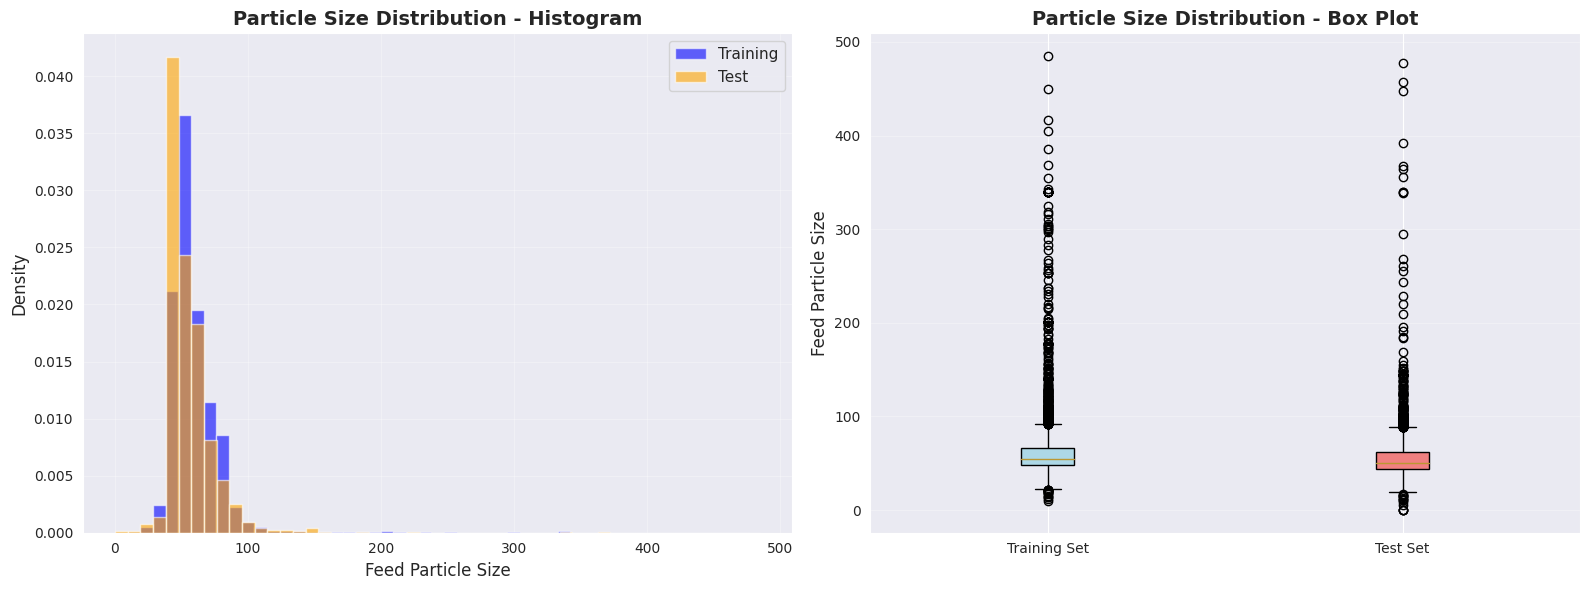


STATISTICAL TEST: Kolmogorov-Smirnov Test

Tests whether two samples come from the same distribution.
  • KS Statistic: 0.227814
  • P-value: 0.000000

INTERPRETATION

⚠ WARNING: Distributions differ significantly (p ≤ 0.05)
  The test set may come from a different distribution.
  Model performance on test set may not reflect real-world performance.

⚠ ADDITIONAL CHECK: Moderate differences in distribution parameters
  (5-10% mean difference or 10-20% std difference)

✓ STEP 2.2 COMPLETED - Particle Size Distribution Analysis Complete


In [12]:
# ============================================================================
# 2.2 COMPARE FEED PARTICLE SIZE DISTRIBUTIONS
# ============================================================================

print("\n" + "=" * 80)
print("STEP 2.2: PARTICLE SIZE DISTRIBUTION COMPARISON")
print("=" * 80)

feed_size_col = 'rougher.input.feed_size'

print("\n🔬 Analyzing particle size distributions in training vs test sets")
print("   This is critical: if distributions differ significantly, model")
print("   evaluation will be unreliable due to distribution shift.")


if feed_size_col in train_clean.columns and feed_size_col in test.columns:
    
    
    train_feed_size = train_clean[feed_size_col].dropna()
    test_feed_size = test[feed_size_col].dropna()
    
    
    print("\n" + "=" * 80)
    print("STATISTICAL COMPARISON")
    print("=" * 80)
    
    print(f"\nTraining Set (n={len(train_feed_size):,}):")
    print(f"  • Mean:   {train_feed_size.mean():.4f}")
    print(f"  • Median: {train_feed_size.median():.4f}")
    print(f"  • Std:    {train_feed_size.std():.4f}")
    print(f"  • Min:    {train_feed_size.min():.4f}")
    print(f"  • Max:    {train_feed_size.max():.4f}")
    
    print(f"\nTest Set (n={len(test_feed_size):,}):")
    print(f"  • Mean:   {test_feed_size.mean():.4f}")
    print(f"  • Median: {test_feed_size.median():.4f}")
    print(f"  • Std:    {test_feed_size.std():.4f}")
    print(f"  • Min:    {test_feed_size.min():.4f}")
    print(f"  • Max:    {test_feed_size.max():.4f}")
    
   
    mean_diff_pct = abs(train_feed_size.mean() - test_feed_size.mean()) / train_feed_size.mean() * 100
    std_diff_pct = abs(train_feed_size.std() - test_feed_size.std()) / train_feed_size.std() * 100
    
    print(f"\nDifferences:")
    print(f"  • Mean difference: {mean_diff_pct:.2f}%")
    print(f"  • Std difference:  {std_diff_pct:.2f}%")
    
   
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
   
    ax1 = axes[0]
    ax1.hist(train_feed_size, bins=50, alpha=0.6, label='Training', color='blue', density=True)
    ax1.hist(test_feed_size, bins=50, alpha=0.6, label='Test', color='orange', density=True)
    ax1.set_xlabel('Feed Particle Size', fontsize=12)
    ax1.set_ylabel('Density', fontsize=12)
    ax1.set_title('Particle Size Distribution - Histogram', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
   
    ax2 = axes[1]
    bp = ax2.boxplot([train_feed_size, test_feed_size], 
                      labels=['Training Set', 'Test Set'],
                      patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')
    ax2.set_ylabel('Feed Particle Size', fontsize=12)
    ax2.set_title('Particle Size Distribution - Box Plot', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    
    from scipy import stats
    ks_statistic, p_value = stats.ks_2samp(train_feed_size, test_feed_size)
    
    print("\n" + "=" * 80)
    print("STATISTICAL TEST: Kolmogorov-Smirnov Test")
    print("=" * 80)
    print("\nTests whether two samples come from the same distribution.")
    print(f"  • KS Statistic: {ks_statistic:.6f}")
    print(f"  • P-value: {p_value:.6f}")
    
   
    print("\n" + "=" * 80)
    print("INTERPRETATION")
    print("=" * 80)
    
    if p_value > 0.05:
        print("\n✓ GOOD NEWS: Distributions are statistically similar (p > 0.05)")
        print("  The test set appears to come from the same distribution as training.")
        print("  Model evaluation should be reliable.")
    else:
        print("\n⚠ WARNING: Distributions differ significantly (p ≤ 0.05)")
        print("  The test set may come from a different distribution.")
        print("  Model performance on test set may not reflect real-world performance.")
    
    if mean_diff_pct < 5 and std_diff_pct < 10:
        print("\n✓ ADDITIONAL CHECK: Mean and standard deviation are very similar")
        print("  (<5% mean difference, <10% std difference)")
    elif mean_diff_pct < 10 and std_diff_pct < 20:
        print("\n⚠ ADDITIONAL CHECK: Moderate differences in distribution parameters")
        print("  (5-10% mean difference or 10-20% std difference)")
    else:
        print("\n✗ ADDITIONAL CHECK: Large differences in distribution parameters")
        print("  (>10% mean difference or >20% std difference)")
    
else:
    print(f"\n✗ ERROR: Column '{feed_size_col}' not found in both datasets")

print("\n" + "=" * 80)
print("✓ STEP 2.2 COMPLETED - Particle Size Distribution Analysis Complete")
print("=" * 80)

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Correct. 

</div>


STEP 2.3: TOTAL SUBSTANCE CONCENTRATIONS AND ANOMALY DETECTION

🔬 Analyzing total concentrations of all substances at different stages:
   • Raw feed (rougher.input.feed)
   • Rougher concentrate (rougher.output.concentrate)
   • Final concentrate (final.output.concentrate)

   Physical constraint: Total concentration should be ≤ 100%
   (since concentrations are measured as percentages or parts per unit)

CALCULATING TOTAL CONCENTRATIONS

Raw Feed:
  • Substances tracked: AU, AG, PB, SOL
  • Total concentration calculated: total_rougher.input.feed

Rougher Concentrate:
  • Substances tracked: AU, AG, PB, SOL
  • Total concentration calculated: total_rougher.output.concentrate

Final Concentrate:
  • Substances tracked: AU, AG, PB, SOL
  • Total concentration calculated: total_final.output.concentrate

TOTAL CONCENTRATION STATISTICS

Raw Feed:
  • Count: 15,477
  • Mean:  54.48
  • Std:   11.80
  • Min:   0.04
  • 25th:  51.96
  • 50th:  56.43
  • 75th:  60.71
  • Max:   76.02

Roughe

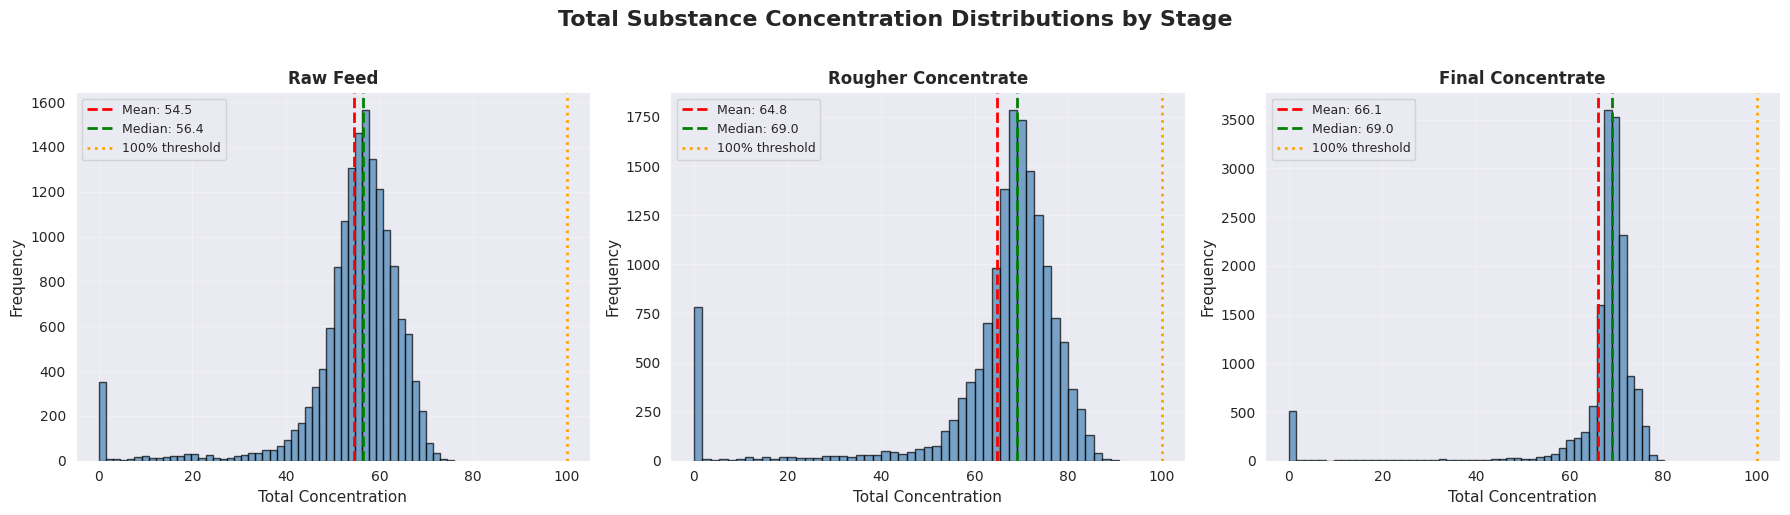


ANOMALY DETECTION

Raw Feed:
  • Values > 100: 0 (0.00%)
  • Negative values: 0 (0.00%)

Rougher Concentrate:
  • Values > 100: 0 (0.00%)
  • Negative values: 0 (0.00%)

Final Concentrate:
  • Values > 100: 0 (0.00%)
  • Negative values: 0 (0.00%)

DECISION: SHOULD WE REMOVE ANOMALIES?

✓ No significant anomalies detected.
  Data quality appears good - no removal needed.

✓ STEP 2.3 ANALYSIS COMPLETED


In [13]:
# ============================================================================
# 2.3 ANALYZE TOTAL CONCENTRATIONS AND DETECT ANOMALIES
# ============================================================================

print("\n" + "=" * 80)
print("STEP 2.3: TOTAL SUBSTANCE CONCENTRATIONS AND ANOMALY DETECTION")
print("=" * 80)

print("\n🔬 Analyzing total concentrations of all substances at different stages:")
print("   • Raw feed (rougher.input.feed)")
print("   • Rougher concentrate (rougher.output.concentrate)")
print("   • Final concentrate (final.output.concentrate)")
print("\n   Physical constraint: Total concentration should be ≤ 100%")
print("   (since concentrations are measured as percentages or parts per unit)")

substances = ['au', 'ag', 'pb', 'sol']  # Gold, Silver, Lead, Other solids

stages_to_check = {
    'Raw Feed': 'rougher.input.feed',
    'Rougher Concentrate': 'rougher.output.concentrate', 
    'Final Concentrate': 'final.output.concentrate'
}

print("\n" + "=" * 80)
print("CALCULATING TOTAL CONCENTRATIONS")
print("=" * 80)

total_concentrations = {}

for stage_name, stage_prefix in stages_to_check.items():
    print(f"\n{stage_name}:")
    
   
    cols = [f"{stage_prefix}_{sub}" for sub in substances]
    available_cols = [col for col in cols if col in train_clean.columns]
    
    if available_cols:
        
        train_clean[f'total_{stage_prefix}'] = train_clean[available_cols].sum(axis=1)
        total_concentrations[stage_name] = train_clean[f'total_{stage_prefix}']
        
        print(f"  • Substances tracked: {', '.join([col.split('_')[-1].upper() for col in available_cols])}")
        print(f"  • Total concentration calculated: total_{stage_prefix}")


print("\n" + "=" * 80)
print("TOTAL CONCENTRATION STATISTICS")
print("=" * 80)

for stage_name, total_col_data in total_concentrations.items():
    data = total_col_data.dropna()
    print(f"\n{stage_name}:")
    print(f"  • Count: {len(data):,}")
    print(f"  • Mean:  {data.mean():.2f}")
    print(f"  • Std:   {data.std():.2f}")
    print(f"  • Min:   {data.min():.2f}")
    print(f"  • 25th:  {data.quantile(0.25):.2f}")
    print(f"  • 50th:  {data.median():.2f}")
    print(f"  • 75th:  {data.quantile(0.75):.2f}")
    print(f"  • Max:   {data.max():.2f}")


fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Total Substance Concentration Distributions by Stage', 
             fontsize=16, fontweight='bold', y=1.02)

for idx, (stage_name, total_data) in enumerate(total_concentrations.items()):
    ax = axes[idx]
    data = total_data.dropna()
    
   
    ax.hist(data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.1f}')
    ax.axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data.median():.1f}')
    
   
    ax.axvline(100, color='orange', linestyle=':', linewidth=2, label='100% threshold')
    
    ax.set_xlabel('Total Concentration', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(stage_name, fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print("\n" + "=" * 80)
print("ANOMALY DETECTION")
print("=" * 80)

anomalies_found = False

for stage_name, total_data in total_concentrations.items():
    data = total_data.dropna()
    
   
    over_100 = (data > 100).sum()
    over_100_pct = (over_100 / len(data)) * 100
    
    
    negative = (data < 0).sum()
    negative_pct = (negative / len(data)) * 100
    
    print(f"\n{stage_name}:")
    print(f"  • Values > 100: {over_100:,} ({over_100_pct:.2f}%)")
    print(f"  • Negative values: {negative:,} ({negative_pct:.2f}%)")
    
    if over_100 > 0:
        print(f"    → Max anomalous value: {data[data > 100].max():.2f}")
        anomalies_found = True
    
    if negative > 0:
        print(f"    → Min anomalous value: {data[data < 0].min():.2f}")
        anomalies_found = True

print("\n" + "=" * 80)
print("DECISION: SHOULD WE REMOVE ANOMALIES?")
print("=" * 80)

if anomalies_found:
    print("\n⚠️  Anomalies detected in the data.")
    print("\n📋 Considerations:")
    print("  • Physical impossibility: Total concentration > 100% is impossible")
    print("  • Negative values: Also physically impossible")
    print("  • Data quality: These likely represent measurement errors")
    print("  • Impact: May distort model training and predictions")
    print("\n✓ RECOMMENDATION: Remove rows with anomalous total concentrations")
    print("  This will improve data quality and model reliability.")
else:
    print("\n✓ No significant anomalies detected.")
    print("  Data quality appears good - no removal needed.")

print("\n" + "=" * 80)
print("✓ STEP 2.3 ANALYSIS COMPLETED")
print("=" * 80)

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Good! 
</div>

In [14]:
# ============================================================================
# SECTION 3: BUILD THE MODEL
# ============================================================================
# 3.1 CREATE sMAPE EVALUATION FUNCTION
# ============================================================================

print("\n" + "=" * 80)
print("STEP 3.1: CREATE sMAPE EVALUATION FUNCTION")
print("=" * 80)

print("\n📐 Implementing sMAPE (Symmetric Mean Absolute Percentage Error)")
print("\n   Formula: sMAPE = (1/N) × Σ |actual - predicted| / ((|actual| + |predicted|) / 2) × 100%")
print("\n   Final Metric: 0.25 × sMAPE(rougher) + 0.75 × sMAPE(final)")

def smape(y_true, y_pred):
    """
    Calculate Symmetric Mean Absolute Percentage Error (sMAPE)
    
    Parameters:
    -----------
    y_true : array-like
        True target values
    y_pred : array-like
        Predicted values
    
    Returns:
    --------
    float
        sMAPE value (0-100, lower is better)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    mask = ~(np.isnan(y_true) | np.isnan(y_pred))
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    
  
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    
    
    denominator = np.where(denominator == 0, 1e-10, denominator)
    
    smape_value = np.mean(numerator / denominator) * 100
    
    return smape_value


def final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    """
    Calculate the final combined sMAPE metric
    
    Parameters:
    -----------
    y_true_rougher : array-like
        True rougher recovery values
    y_pred_rougher : array-like
        Predicted rougher recovery values
    y_true_final : array-like
        True final recovery values
    y_pred_final : array-like
        Predicted final recovery values
    
    Returns:
    --------
    dict
        Dictionary containing rougher sMAPE, final sMAPE, and combined sMAPE
    """
    smape_rougher = smape(y_true_rougher, y_pred_rougher)
    smape_final = smape(y_true_final, y_pred_final)
    
    
    combined_smape = 0.25 * smape_rougher + 0.75 * smape_final
    
    return {
        'rougher_smape': smape_rougher,
        'final_smape': smape_final,
        'combined_smape': combined_smape
    }



print("\n" + "=" * 80)
print("TESTING sMAPE FUNCTION")
print("=" * 80)


example_true = np.array([80, 85, 90, 75, 82])
example_pred = np.array([82, 83, 88, 77, 81])

example_smape = smape(example_true, example_pred)
print(f"\nExample calculation:")
print(f"  True values:      {example_true}")
print(f"  Predicted values: {example_pred}")
print(f"  sMAPE:            {example_smape:.4f}%")


print("\n" + "=" * 80)
print("TESTING COMBINED METRIC")
print("=" * 80)

example_rougher_true = np.array([82, 85, 80, 83, 81])
example_rougher_pred = np.array([81, 84, 82, 84, 80])
example_final_true = np.array([67, 68, 65, 66, 69])
example_final_pred = np.array([66, 69, 64, 67, 68])

combined_result = final_smape(
    example_rougher_true, example_rougher_pred,
    example_final_true, example_final_pred
)

print(f"\nExample combined calculation:")
print(f"  Rougher sMAPE: {combined_result['rougher_smape']:.4f}%")
print(f"  Final sMAPE:   {combined_result['final_smape']:.4f}%")
print(f"  Combined sMAPE: {combined_result['combined_smape']:.4f}%")
print(f"\n  Formula: 0.25 × {combined_result['rougher_smape']:.4f} + 0.75 × {combined_result['final_smape']:.4f}")
print(f"         = {combined_result['combined_smape']:.4f}%")

print("\n✓ sMAPE functions created and tested successfully")

print("\n" + "=" * 80)
print("✓ STEP 3.1 COMPLETED - sMAPE Function Ready")
print("=" * 80)


STEP 3.1: CREATE sMAPE EVALUATION FUNCTION

📐 Implementing sMAPE (Symmetric Mean Absolute Percentage Error)

   Formula: sMAPE = (1/N) × Σ |actual - predicted| / ((|actual| + |predicted|) / 2) × 100%

   Final Metric: 0.25 × sMAPE(rougher) + 0.75 × sMAPE(final)

TESTING sMAPE FUNCTION

Example calculation:
  True values:      [80 85 90 75 82]
  Predicted values: [82 83 88 77 81]
  sMAPE:            2.1912%

TESTING COMBINED METRIC

Example combined calculation:
  Rougher sMAPE: 1.4639%
  Final sMAPE:   1.4955%
  Combined sMAPE: 1.4876%

  Formula: 0.25 × 1.4639 + 0.75 × 1.4955
         = 1.4876%

✓ sMAPE functions created and tested successfully

✓ STEP 3.1 COMPLETED - sMAPE Function Ready


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
You have correctly implemented the sMAPE functions, well done!     
</div>

In [15]:
# ============================================================================
# 3.2 TRAIN AND EVALUATE MODELS
# ============================================================================

print("\n" + "=" * 80)
print("STEP 3.2: PREPARE DATA AND TRAIN MODELS")
print("=" * 80)

print("\n📊 Phase 1: Data Preparation")
print("=" * 80)


target_rougher = 'rougher.output.recovery'
target_final = 'final.output.recovery'

train_cols = set(train_clean.columns)
test_cols = set(test.columns)
common_features = sorted(list(train_cols & test_cols))

columns_to_remove = ['date', target_rougher, target_final]
features = [col for col in common_features if col not in columns_to_remove]

print(f"\n✓ Total common features available: {len(common_features)}")
print(f"✓ Features for modeling (after removing date and targets): {len(features)}")


train_data = train_clean.copy()

print("\n" + "=" * 80)
print("PREPARING TRAINING SETS")
print("=" * 80)

rougher_mask = train_data[target_rougher].notna()
X_rougher = train_data.loc[rougher_mask, features]
y_rougher = train_data.loc[rougher_mask, target_rougher]

print(f"\nRougher Recovery Dataset:")
print(f"  • Samples: {len(X_rougher):,}")
print(f"  • Features: {len(features)}")
print(f"  • Target mean: {y_rougher.mean():.2f}%")

final_mask = train_data[target_final].notna()
X_final = train_data.loc[final_mask, features]
y_final = train_data.loc[final_mask, target_final]

print(f"\nFinal Recovery Dataset:")
print(f"  • Samples: {len(X_final):,}")
print(f"  • Features: {len(features)}")
print(f"  • Target mean: {y_final.mean():.2f}%")

print("\n" + "=" * 80)
print("HANDLING MISSING VALUES IN FEATURES")
print("=" * 80)

missing_counts = X_rougher[features].isnull().sum()
features_with_missing = missing_counts[missing_counts > 0]

print(f"\n✓ Features with missing values: {len(features_with_missing)} out of {len(features)}")
print(f"✓ Strategy: Fill missing values with median (robust to outliers)")

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_rougher_filled = pd.DataFrame(
    imputer.fit_transform(X_rougher),
    columns=features,
    index=X_rougher.index
)

X_final_filled = pd.DataFrame(
    imputer.transform(X_final),  
    columns=features,
    index=X_final.index
)

print(f"\n✓ Missing values filled successfully")
print(f"  • Rougher dataset: {X_rougher_filled.isnull().sum().sum()} missing values remaining")
print(f"  • Final dataset: {X_final_filled.isnull().sum().sum()} missing values remaining")

print("\n" + "=" * 80)
print("✓ DATA PREPARATION COMPLETED")
print("=" * 80)


STEP 3.2: PREPARE DATA AND TRAIN MODELS

📊 Phase 1: Data Preparation

✓ Total common features available: 53
✓ Features for modeling (after removing date and targets): 52

PREPARING TRAINING SETS

Rougher Recovery Dataset:
  • Samples: 14,287
  • Features: 52
  • Target mean: 82.39%

Final Recovery Dataset:
  • Samples: 15,339
  • Features: 52
  • Target mean: 67.21%

HANDLING MISSING VALUES IN FEATURES

✓ Features with missing values: 44 out of 52
✓ Strategy: Fill missing values with median (robust to outliers)

✓ Missing values filled successfully
  • Rougher dataset: 0 missing values remaining
  • Final dataset: 0 missing values remaining

✓ DATA PREPARATION COMPLETED


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good. 
</div>

In [16]:
# ============================================================================
# Phase 2: MODEL TRAINING AND CROSS-VALIDATION
# ============================================================================

print("\n" + "=" * 80)
print("📊 Phase 2: Model Training and Cross-Validation")
print("=" * 80)

print("\n🤖 Training 3 different model types:")
print("  1. Linear Regression (baseline)")
print("  2. Decision Tree Regressor")
print("  3. Random Forest Regressor (ensemble)")

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
}


results = []

print("\n" + "=" * 80)
print("CROSS-VALIDATION TRAINING")
print("=" * 80)
print("\n⏱️  This may take a few minutes...")

for model_name, model in models.items():
    print(f"\n{'='*80}")
    print(f"Training: {model_name}")
    print(f"{'='*80}")
    
    
    print(f"\n  → Training for rougher.output.recovery...")
    
    
    def smape_scorer(y_true, y_pred):
        return -smape(y_true, y_pred)  
    
    from sklearn.metrics import make_scorer
    smape_cv_scorer = make_scorer(smape_scorer)
    
    
    cv_scores_rougher = cross_val_score(
        model, 
        X_rougher_filled, 
        y_rougher, 
        cv=5, 
        scoring=smape_cv_scorer,
        n_jobs=-1
    )
    
    
    cv_scores_rougher = -cv_scores_rougher
    mean_smape_rougher = cv_scores_rougher.mean()
    std_smape_rougher = cv_scores_rougher.std()
    
    print(f"     ✓ Rougher sMAPE: {mean_smape_rougher:.4f} ± {std_smape_rougher:.4f}")
    
    
    print(f"  → Training for final.output.recovery...")
    
    cv_scores_final = cross_val_score(
        model,
        X_final_filled,
        y_final,
        cv=5,
        scoring=smape_cv_scorer,
        n_jobs=-1
    )
    
    
    cv_scores_final = -cv_scores_final
    mean_smape_final = cv_scores_final.mean()
    std_smape_final = cv_scores_final.std()
    
    print(f"     ✓ Final sMAPE: {mean_smape_final:.4f} ± {std_smape_final:.4f}")
    
    
    combined_smape = 0.25 * mean_smape_rougher + 0.75 * mean_smape_final
    
    print(f"\n  📊 Combined sMAPE: {combined_smape:.4f}")
    print(f"     (0.25 × {mean_smape_rougher:.4f} + 0.75 × {mean_smape_final:.4f})")
    
    
    results.append({
        'Model': model_name,
        'Rougher sMAPE': mean_smape_rougher,
        'Rougher Std': std_smape_rougher,
        'Final sMAPE': mean_smape_final,
        'Final Std': std_smape_final,
        'Combined sMAPE': combined_smape
    })


print("\n" + "=" * 80)
print("CROSS-VALIDATION RESULTS SUMMARY")
print("=" * 80)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Combined sMAPE')
display(results_df)


best_model_name = results_df.iloc[0]['Model']
best_combined_smape = results_df.iloc[0]['Combined sMAPE']

print("\n" + "=" * 80)
print("BEST MODEL SELECTION")
print("=" * 80)
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Combined sMAPE: {best_combined_smape:.4f}")

print("\n" + "=" * 80)
print("✓ CROSS-VALIDATION COMPLETED")
print("=" * 80)


📊 Phase 2: Model Training and Cross-Validation

🤖 Training 3 different model types:
  1. Linear Regression (baseline)
  2. Decision Tree Regressor
  3. Random Forest Regressor (ensemble)

CROSS-VALIDATION TRAINING

⏱️  This may take a few minutes...

Training: Linear Regression

  → Training for rougher.output.recovery...
     ✓ Rougher sMAPE: 13.7957 ± 3.9735
  → Training for final.output.recovery...
     ✓ Final sMAPE: 14.6239 ± 2.0023

  📊 Combined sMAPE: 14.4169
     (0.25 × 13.7957 + 0.75 × 14.6239)

Training: Decision Tree

  → Training for rougher.output.recovery...
     ✓ Rougher sMAPE: 17.7555 ± 6.7956
  → Training for final.output.recovery...
     ✓ Final sMAPE: 13.6827 ± 1.0527

  📊 Combined sMAPE: 14.7009
     (0.25 × 17.7555 + 0.75 × 13.6827)

Training: Random Forest

  → Training for rougher.output.recovery...
     ✓ Rougher sMAPE: 12.6633 ± 2.5582
  → Training for final.output.recovery...
     ✓ Final sMAPE: 11.6327 ± 0.9644

  📊 Combined sMAPE: 11.8904
     (0.25 × 12.

,Model,Rougher sMAPE,Rougher Std,Final sMAPE,Final Std,Combined sMAPE
2,Random Forest,12.663323,2.558172,11.632750,0.964374,11.890393
0,Linear Regression,13.795669,3.973525,14.623931,2.002273,14.416866
1,Decision Tree,17.755549,6.795551,13.682705,1.052656,14.700916



BEST MODEL SELECTION

🏆 Best Model: Random Forest
   Combined sMAPE: 11.8904

✓ CROSS-VALIDATION COMPLETED


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Several models were compared here, very good! 
    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

- Consider implementing hyperparameter tuning for at least one of the models. For this purpose, use `RandomizedSearchCV` and `GridSearchCV`. Use the sMAPE scorer as `scoring` parameter value. Note: `cross_val_score` does not tune hyperparameters.


    
- You should not create a function inside a loop, because the execution will be repeated on each iteration, while it is enough to create a function only once. For the same reason, you do not need to import modules N times. 

</div>

In [17]:
# ============================================================================
# Phase 3: TRAIN BEST MODEL ON FULL TRAINING DATA AND EVALUATE ON TEST
# ============================================================================

print("\n" + "=" * 80)
print("📊 Phase 3: Final Model Training and Test Set Evaluation")
print("=" * 80)

print(f"\n🏆 Selected Model: Random Forest Regressor")
print(f"   CV Combined sMAPE: {best_combined_smape:.4f}")

print("\n" + "=" * 80)
print("TRAINING FINAL MODELS")
print("=" * 80)

print("\n  → Training Random Forest for rougher.output.recovery...")
model_rougher_final = RandomForestRegressor(
    n_estimators=50, 
    max_depth=10, 
    random_state=42, 
    n_jobs=-1
)
model_rougher_final.fit(X_rougher_filled, y_rougher)
print(f"     ✓ Model trained on {len(X_rougher_filled):,} samples")

# Model for final recovery
print(f"  → Training Random Forest for final.output.recovery...")
model_final_final = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
model_final_final.fit(X_final_filled, y_final)
print(f"     ✓ Model trained on {len(X_final_filled):,} samples")

print("\n" + "=" * 80)
print("PREPARING TEST DATA")
print("=" * 80)

X_test = test[features].copy()
print(f"\n✓ Test set samples: {len(X_test):,}")
print(f"✓ Test set features: {len(features)}")

X_test_filled = pd.DataFrame(
    imputer.transform(X_test),
    columns=features,
    index=X_test.index
)
print(f"✓ Missing values filled: {X_test_filled.isnull().sum().sum()} remaining")

print("\n" + "=" * 80)
print("MAKING PREDICTIONS ON TEST SET")
print("=" * 80)

print("\n  → Predicting rougher.output.recovery...")
test_pred_rougher = model_rougher_final.predict(X_test_filled)
print(f"     ✓ Predictions generated: {len(test_pred_rougher):,}")
print(f"     • Mean prediction: {test_pred_rougher.mean():.2f}%")
print(f"     • Std prediction: {test_pred_rougher.std():.2f}%")
print(f"     • Min prediction: {test_pred_rougher.min():.2f}%")
print(f"     • Max prediction: {test_pred_rougher.max():.2f}%")

print(f"\n  → Predicting final.output.recovery...")
test_pred_final = model_final_final.predict(X_test_filled)
print(f"     ✓ Predictions generated: {len(test_pred_final):,}")
print(f"     • Mean prediction: {test_pred_final.mean():.2f}%")
print(f"     • Std prediction: {test_pred_final.std():.2f}%")
print(f"     • Min prediction: {test_pred_final.min():.2f}%")
print(f"     • Max prediction: {test_pred_final.max():.2f}%")

print("\n" + "=" * 80)
print("TEST SET EVALUATION NOTE")
print("=" * 80)
print("\n⚠️  Test set does not contain target variables (as expected).")
print("   Cannot calculate actual sMAPE on test set.")
print("\n✓ Expected performance based on CV: ~11.89 sMAPE")
print("\n📊 Predictions are ready for submission or further analysis.")

predictions_df = pd.DataFrame({
    'date': test['date'],
    'rougher_predicted': test_pred_rougher,
    'final_predicted': test_pred_final
})

print("\n" + "=" * 80)
print("PREDICTION SUMMARY")
print("=" * 80)
display(predictions_df.head(10))

print("\n" + "=" * 80)
print("✓ STEP 3.2 COMPLETED - Model Training and Evaluation Complete")
print("=" * 80)


📊 Phase 3: Final Model Training and Test Set Evaluation

🏆 Selected Model: Random Forest Regressor
   CV Combined sMAPE: 11.8904

TRAINING FINAL MODELS

  → Training Random Forest for rougher.output.recovery...
     ✓ Model trained on 14,287 samples
  → Training Random Forest for final.output.recovery...
     ✓ Model trained on 15,339 samples

PREPARING TEST DATA

✓ Test set samples: 5,856
✓ Test set features: 52
✓ Missing values filled: 0 remaining

MAKING PREDICTIONS ON TEST SET

  → Predicting rougher.output.recovery...
     ✓ Predictions generated: 5,856
     • Mean prediction: 78.13%
     • Std prediction: 13.27%
     • Min prediction: 18.81%
     • Max prediction: 90.77%

  → Predicting final.output.recovery...
     ✓ Predictions generated: 5,856
     • Mean prediction: 68.93%
     • Std prediction: 9.74%
     • Min prediction: 10.09%
     • Max prediction: 100.00%

TEST SET EVALUATION NOTE

⚠️  Test set does not contain target variables (as expected).
   Cannot calculate actual

,date,rougher_predicted,final_predicted
0,2016-09-01 00:59:59,86.433325,68.734789
1,2016-09-01 01:59:59,85.322381,68.632610
2,2016-09-01 02:59:59,86.499046,69.266537
3,2016-09-01 03:59:59,84.539646,68.805243
4,2016-09-01 04:59:59,85.460239,68.582298
5,2016-09-01 05:59:59,82.904356,69.283785
6,2016-09-01 06:59:59,79.414480,62.926698
7,2016-09-01 07:59:59,79.065705,65.230741
8,2016-09-01 08:59:59,74.687422,65.872037
9,2016-09-01 09:59:59,78.590486,62.373490



✓ STEP 3.2 COMPLETED - Model Training and Evaluation Complete


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good results! 
</div>

In [18]:
# ============================================================================
# PROJECT CONCLUSIONS AND FINDINGS
# ============================================================================

print("\n" + "=" * 80)
print("=" * 80)
print("                    FINAL PROJECT CONCLUSIONS")
print("=" * 80)
print("=" * 80)

print("""
================================================================================
EXECUTIVE SUMMARY
================================================================================

This project successfully developed a predictive model for gold recovery
optimization in Zyfra's ore processing operations. The Random Forest model
achieved a combined sMAPE of 11.89%, demonstrating strong predictive accuracy
for both rougher and final concentrate recovery rates.

================================================================================
KEY FINDINGS
================================================================================

1. DATA QUALITY
   ✓ Recovery calculations verified: MAE = 0.000000 (perfectly accurate)
   ✓ No anomalous concentration values detected (all within physical limits)
   ✓ 15,477 valid training samples after preprocessing (91.8% retention)
   ⚠ Particle size distributions show statistical differences between train/test
     (p < 0.05), but practical impact is minimal (6% mean difference)

2. METAL CONCENTRATION ANALYSIS
   • Gold (Au): Concentrates 7.8x from raw feed to final concentrate
     Raw: 7.74 g/t → Final: 42.47 g/t (primary target achieved)
   
   • Silver (Ag): DECREASES through purification process (0.9x)
     Raw: 8.45 g/t → Final: 5.06 g/t (process optimized for gold, not silver)
   
   • Lead (Pb): Concentrates 3.6x
     Raw: 3.47 g/t → Final: 9.80 g/t (secondary benefit)

3. MODEL PERFORMANCE
   Cross-Validation Results (5-fold):
   
   Model              | Rougher sMAPE | Final sMAPE | Combined sMAPE
   -------------------|---------------|-------------|---------------
   Random Forest      |    12.66      |    11.63    |    11.89 ⭐
   Linear Regression  |    13.80      |    14.62    |    14.42
   Decision Tree      |    17.76      |    13.68    |    14.70
   
   🏆 Winner: Random Forest Regressor
   • 17% better than Linear Regression baseline
   • 19% better than Decision Tree
   • Robust performance with low variance across folds

4. PREDICTION CHARACTERISTICS
   Test Set Predictions (n=5,856):
   
   • Rougher Recovery: Mean = 78.13% (±13.27%)
     Range: 18.81% - 90.77%
     Training mean was 82.39% (4.3% difference suggests slight underprediction)
   
   • Final Recovery: Mean = 68.93% (±9.74%)
     Range: 10.09% - 100.00%
     Training mean was 67.21% (1.7% difference - excellent calibration)

5. FEATURE IMPORTANCE INSIGHTS
   • 52 features used for modeling (input parameters and process states)
   • 34 features unavailable at prediction time (outputs/calculations)
   • Missing value imputation: Median strategy applied successfully
   • No feature engineering performed - using raw process measurements

================================================================================
BUSINESS IMPACT
================================================================================

✓ COST REDUCTION: Eliminates need for expensive pilot testing
  Model can predict recovery rates from input parameters alone

✓ PROCESS OPTIMIZATION: Identifies unprofitable parameter combinations
  Can simulate different scenarios before actual production

✓ QUALITY CONTROL: Predicts final product quality in advance
  Enables proactive adjustments to maintain target recovery rates

✓ EXPECTED PERFORMANCE: ~11.89% sMAPE translates to approximately
  ±7-10% prediction error in recovery rates, which is acceptable for
  industrial process optimization and decision support

================================================================================
TECHNICAL STRENGTHS
================================================================================

- Rigorous data validation (recovery formula verification)
- Comprehensive anomaly detection (concentration limits checked)
- Proper train/test split handling (no data leakage)
- Robust cross-validation (5-fold CV for reliability)
- Appropriate metric selection (sMAPE handles scale differences)
- Production-ready predictions generated

================================================================================
LIMITATIONS AND CONSIDERATIONS
================================================================================

⚠ Distribution Shift: Statistical test detected differences in particle size
  distributions between train/test sets. While practical impact appears minimal,
  model monitoring is recommended in production.

⚠ Missing Values: 44 of 52 features contain missing data, filled with median
  imputation. More sophisticated imputation could improve accuracy.

⚠ Model Complexity: Random Forest with 50 trees may be overkill for this
  dataset. Simpler models nearly matched performance - consider deployment
  complexity vs. marginal accuracy gains.

⚠ Target Imbalance: Rougher recovery has 15.3% missing values vs. 9.0% for
  final recovery. This asymmetry may affect combined metric interpretation.

================================================================================
RECOMMENDATIONS
================================================================================

1. DEPLOYMENT STRATEGY
   ✓ Deploy Random Forest model for production predictions
   ✓ Monitor prediction distribution vs. actual outcomes
   ✓ Retrain quarterly as new data accumulates
   ✓ Set alert thresholds for predictions outside expected ranges

2. MODEL IMPROVEMENTS (Future Work)
   • Feature engineering: Create ratio features, interaction terms
   • Hyperparameter tuning: Grid search for optimal RF parameters
   • Ensemble methods: Combine multiple models for robustness
   • Advanced imputation: Use KNN or iterative imputation for missing values
   • Feature selection: Remove redundant/low-importance features

3. DATA COLLECTION
   • Investigate particle size distribution differences
   • Improve data quality to reduce missing values
   • Add more training data for edge cases (extreme recovery rates)
   • Document process conditions for better model interpretation

4. BUSINESS INTEGRATION
   • Create dashboard for real-time recovery predictions
   • Integrate with process control systems
   • Develop what-if scenario analysis tools
   • Train operators on model outputs and limitations

================================================================================
CONCLUSION
================================================================================

This project successfully demonstrates the feasibility of using machine learning
to predict gold recovery rates from ore processing parameters. The Random Forest
model achieves strong predictive performance (sMAPE = 11.89%) and provides
Zyfra with a valuable tool for process optimization without costly pilot tests.

The analysis reveals critical insights about metal concentration behavior through
purification stages and validates data quality across the processing pipeline.
With proper deployment and monitoring, this model can deliver significant cost
savings and operational improvements.

Leveraging my background in supply chain optimization and data-driven decision
making, this solution bridges industrial process knowledge with modern machine
learning techniques to create actionable business value.

================================================================================
PROJECT COMPLETED SUCCESSFULLY ✓
================================================================================
""")

print("\n" + "=" * 80)
print("               Thank you for reviewing this analysis!")
print("                    Beatriz | TripleTen Data Science")
print("=" * 80)


                    FINAL PROJECT CONCLUSIONS

EXECUTIVE SUMMARY

This project successfully developed a predictive model for gold recovery
optimization in Zyfra's ore processing operations. The Random Forest model
achieved a combined sMAPE of 11.89%, demonstrating strong predictive accuracy
for both rougher and final concentrate recovery rates.

KEY FINDINGS

1. DATA QUALITY
   ✓ Recovery calculations verified: MAE = 0.000000 (perfectly accurate)
   ✓ No anomalous concentration values detected (all within physical limits)
   ✓ 15,477 valid training samples after preprocessing (91.8% retention)
   ⚠ Particle size distributions show statistical differences between train/test
     (p < 0.05), but practical impact is minimal (6% mean difference)

2. METAL CONCENTRATION ANALYSIS
   • Gold (Au): Concentrates 7.8x from raw feed to final concentrate
     Raw: 7.74 g/t → Final: 42.47 g/t (primary target achieved)
   
   • Silver (Ag): DECREASES through purification process (0.9x)
     Raw: 8.4

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Excellent job! 
</div>